In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib_inline

In [4]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9) 

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


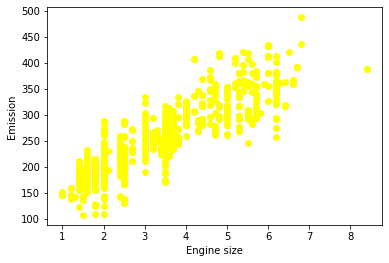

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='yellow')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# نکته مهم در مورد پلی نومیال همینه که اینجا هم ارتباط دو متغیر با همدیگه رو بررسی می کنیم اما حس کرده ایم که ارتباطشان خطی نیست

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly


array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

# میبینیم که اینجا به کمک این کتابخانه یک ایکس به سه تا ایکس تبدیل می شود (ایکس به توان صفر یعنی یک، ایکس به توان یک، و ایکس به توان ۲)

In [13]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         51.11056666 -1.56825856]]
Intercept:  [106.06020728]


Text(0, 0.5, 'Emission')

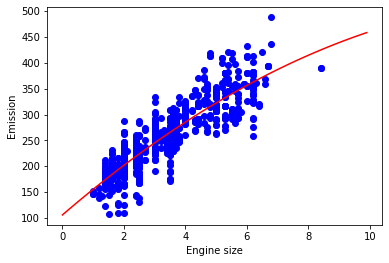

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [15]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 25.04
Residual sum of squares (MSE): 1067.57
R2-score: 0.71


# یک مثال دیگه از رگرسیون پلی نامیال

In [17]:
cdf=df[['FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,8.5,196
1,9.6,221
2,5.9,136
3,11.1,255
4,10.6,244


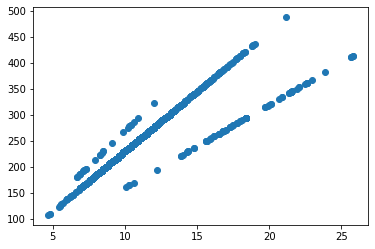

In [18]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.show()

In [20]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.000000e+00, 9.600000e+00, 9.216000e+01, 8.847360e+02],
       [1.000000e+00, 5.900000e+00, 3.481000e+01, 2.053790e+02],
       [1.000000e+00, 1.110000e+01, 1.232100e+02, 1.367631e+03],
       ...,
       [1.000000e+00, 1.180000e+01, 1.392400e+02, 1.643032e+03],
       [1.000000e+00, 1.130000e+01, 1.276900e+02, 1.442897e+03],
       [1.000000e+00, 1.280000e+01, 1.638400e+02, 2.097152e+03]])

In [22]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  3.81994414e+01 -7.67308306e-01 -2.43114292e-03]]
Intercept:  [-69.12991329]


Text(0, 0.5, 'Emission')

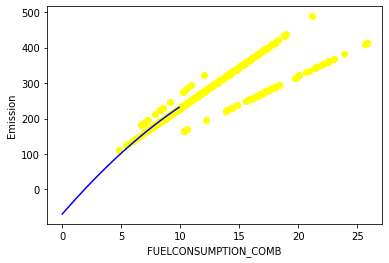

In [27]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='yellow')

XX = np.arange(0.0, 10.0, 0.1)
#با این ایمس ایکس روی محور ایکس رو از صفر تا 10 یک دهم یک دهم جدا میکنه
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)+clf.coef_[0][3]*np.power(XX, 3)

plt.plot(XX, yy, '-b' )
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

In [28]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 11.86
Residual sum of squares (MSE): 487.04
R2-score: 0.88
